In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image


/Users/greg/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
%matplotlib inline

In [2]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/greg/Dropbox/Jupyter/SleepDataWALIII.tif')

In [3]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [4]:
data.dtype

'uint8'

In [5]:
data.cache()
data.count();

In [11]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

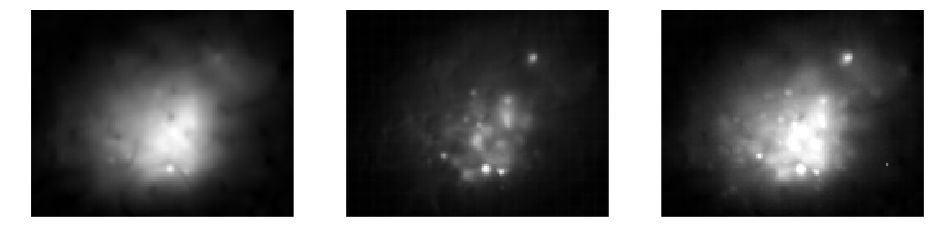

In [12]:
# look at the mean image
im = data.mean()


ax1 = plt.subplot(131)
im = data.mean()
image(im[:])
plt.subplot(132)
img = data.stdev()
image(img[:])
plt.subplot(133)
img = data.max()
image(img[:])

In [13]:
ts = data.toTimeSeries()

In [14]:
# Run PCA with three components

from thunder import PCA
model = PCA(k=4).fit(ts)

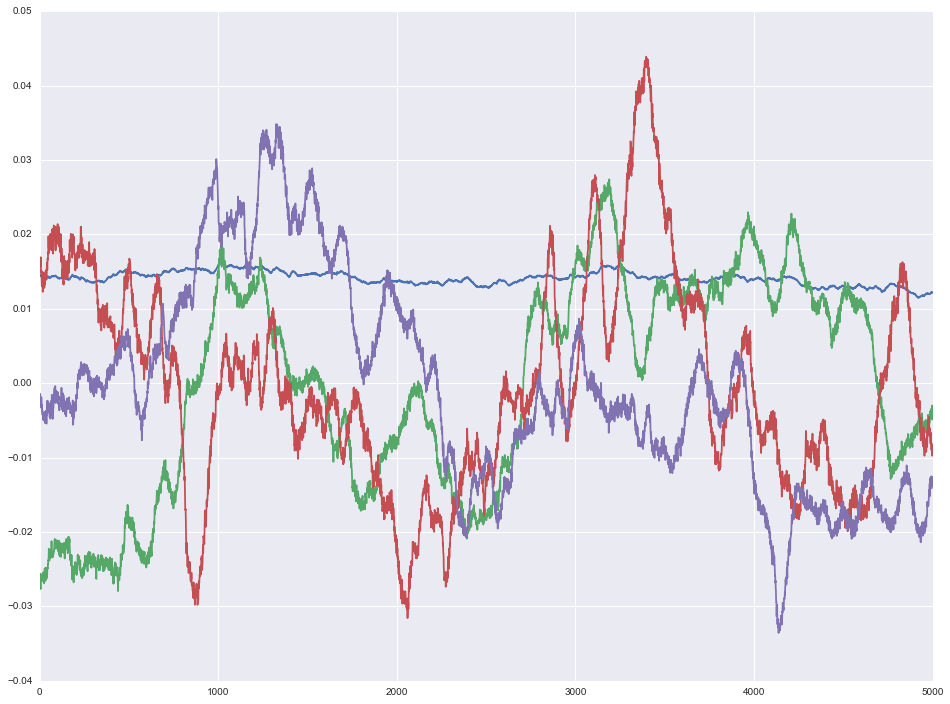

In [15]:
plt.plot(model.comps.T);



In [16]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one.

imgs = model.scores.pack()
imgs.shape

(4, 126, 160)

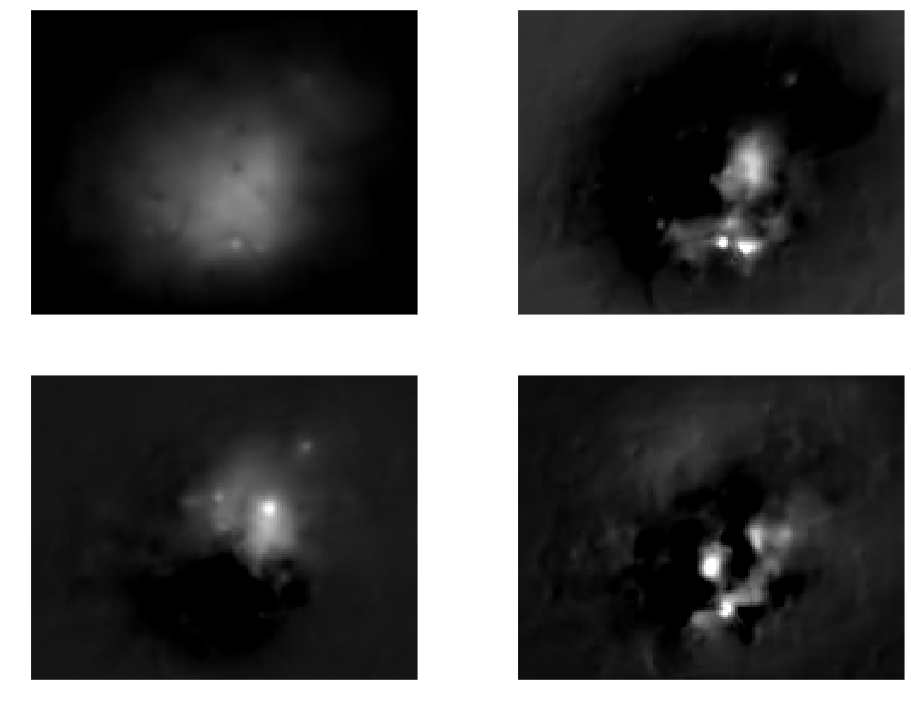

In [17]:
CX = (-0.005,0.05)

ax1 = plt.subplot(221)
image(imgs[0,:,:], clim=CX)
ax1 = plt.subplot(222)
image(imgs[1,:,:], clim=CX)
ax1 = plt.subplot(223)
image(imgs[2,:,:], clim=CX)
ax1 = plt.subplot(224)
image(imgs[3,:,:], clim=CX)

In [18]:
# take the last 3 PCs, since the first one dosn't look to informative...
gg = model.comps[1:,:]
gg.shape

(3, 5001)

In [19]:
imgs = model.scores.pack()
imgs2 = imgs[1:,:,:] # first 3
imgs3 = imgs[:3,:,:]  # Last 3
imgs2.shape

(3, 126, 160)

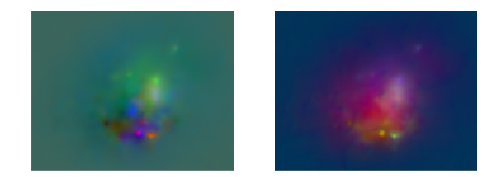

In [20]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=.8).transform(imgs2)
ax1 = plt.subplot(121)
image(maps,2)


maps = Colorize(cmap='rgb', scale=.7).transform(imgs3)
ax1 = plt.subplot(122)
image(maps,2)

In [21]:
# So maybe it is better to normalize the data:
ts2 = data.toTimeSeries().normalize()

In [27]:
# Run PCA with three components

from thunder import PCA
model2 = PCA(k=10).fit(ts2)

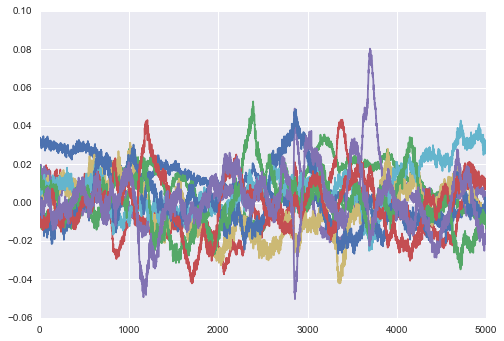

In [28]:
plt.plot(model2.comps.T);

In [29]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one, just like we did before...

imgs2 = model2.scores.pack()
imgs2.shape

(10, 126, 160)

In [44]:
# Lets seperate into the first an last three basis functions:
imgsA = imgs2[0:3,:,:] # first 3
imgsB = imgs2[1:4,:,:]  # Last 3
imgsC = imgs2[2:5,:,:] # first 3
imgsD = imgs2[3:6,:,:]  # Last 3
imgsE = imgs2[4:7,:,:] # first 3
imgsF = imgs2[5:8,:,:]  # Last 3

imgsB.shape

(3, 126, 160)

Resize images to fit screen....

In [36]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

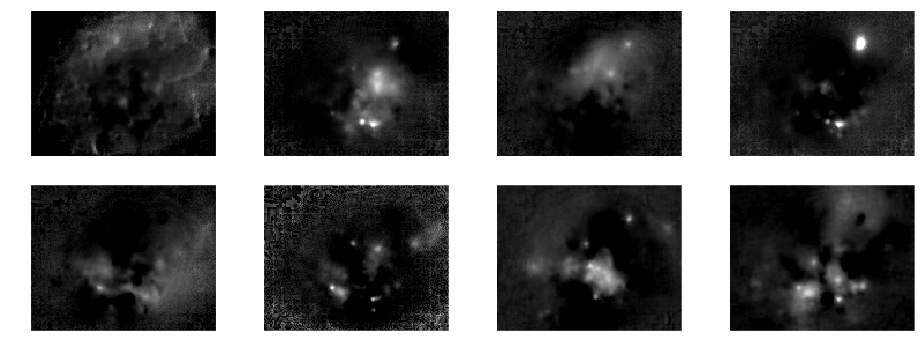

In [37]:
CX = (-0.005,0.05)

ax1 = plt.subplot(441)
image(imgs2[0,:,:], clim=CX)
ax1 = plt.subplot(442)
image(imgs2[1,:,:], clim=CX)
ax1 = plt.subplot(443)
image(imgs2[2,:,:], clim=CX)
ax1 = plt.subplot(444)
image(imgs2[3,:,:], clim=CX)


ax1 = plt.subplot(445)
image(imgs2[4,:,:], clim=CX)
ax1 = plt.subplot(446)
image(imgs2[5,:,:], clim=CX)
ax1 = plt.subplot(447)
image(imgs2[6,:,:], clim=CX)
ax1 = plt.subplot(448)
image(imgs2[7,:,:], clim=CX)

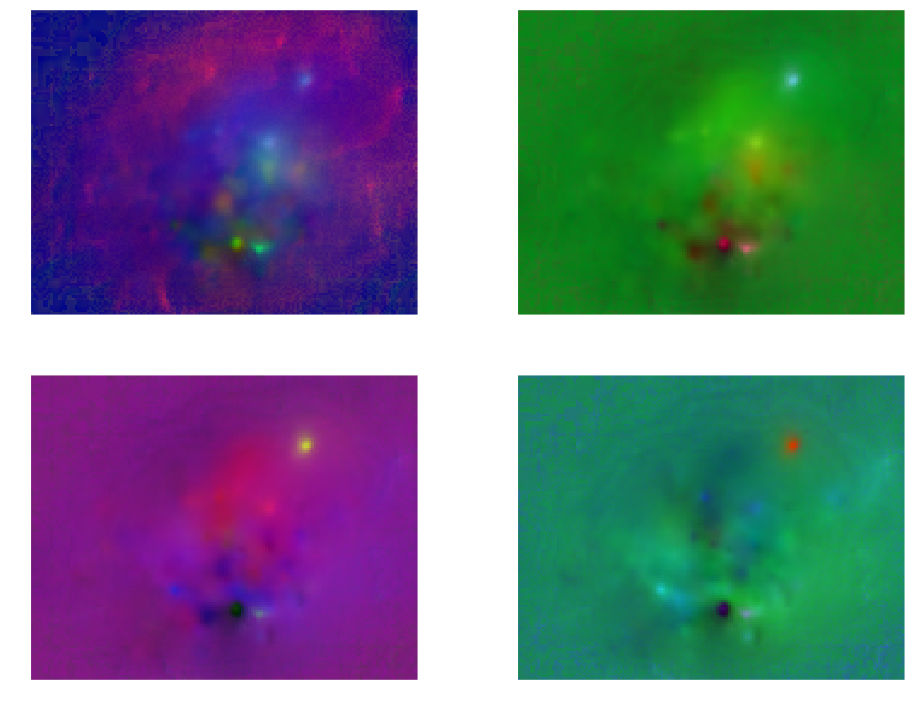

In [47]:
from numpy import amax
# sns.set_context('notebook')

Sc = 0.8
maps = Colorize(cmap='rgb', scale=Sc).transform(imgsA)
ax1 = plt.subplot(221)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsB)
ax1 = plt.subplot(222)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsC)
ax1 = plt.subplot(223)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsD)
ax1 = plt.subplot(224)
image(maps,2)
